In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
data=pd.read_excel('/content/Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# Handle missing values
data = data.dropna(subset=["CustomerID"])
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

In [21]:
customer_df = data.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

In [22]:
customer_df.rename(columns={'InvoiceNo': 'TransactionCount'}, inplace=True)

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df[['TotalPrice', 'TransactionCount','Quantity']])

In [24]:
customer_df.head()

,CustomerID,TotalPrice,Quantity,TransactionCount
0,12346.0,77183.60,74215,1
1,12347.0,4310.00,2458,7
2,12348.0,1797.24,2341,4
3,12349.0,1757.55,631,1
4,12350.0,334.40,197,1


In [30]:
# Finding optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

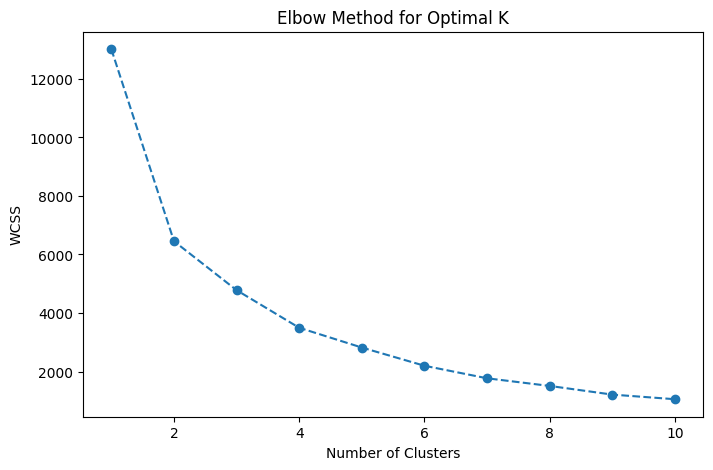

In [32]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [33]:
# Apply K-Means Clustering
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_df['Cluster'] = kmeans.fit_predict(scaled_data)

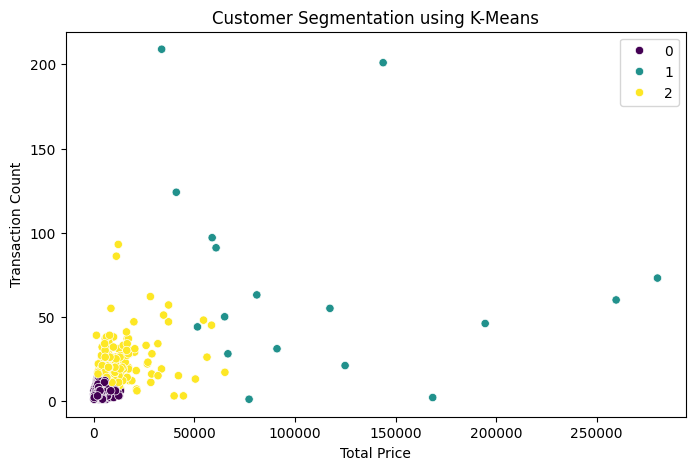

In [41]:
# Visualizing the Clusters
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x=customer_df['TotalPrice'], y=customer_df['TransactionCount'], hue=customer_df['Cluster'], palette='viridis')
plt.xlabel('Total Price')
plt.ylabel('Transaction Count')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()

In [49]:
cluster_report = customer_df.groupby('Cluster').agg({'TotalPrice': ['count', 'mean', 'sum'],
                                                     'TransactionCount': ['mean', 'sum']})
print("Cluster Report:\n", cluster_report)


Cluster Report:
         TotalPrice                             TransactionCount       
             count           mean          sum             mean    sum
Cluster                                                               
0             4093    1091.627050  4468029.514         3.072319  12575
1               17  112694.244706  1915802.160        70.352941   1196
2              228   11085.860658  2527576.230        20.881579   4761
